# Import Dependencies

In [2]:
!pip install tensorflow matplotlib tensorflow-datasets ipywidgets


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
#bringing in tensorflow dataset
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

In [4]:
pip install --upgrade tensorflow tensorflow-datasets

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
ds=tfds.load('fashion_mnist', split='train')

In [6]:
ds.as_numpy_iterator().next()['label']

2

In [7]:
type(ds)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

# viz data & build dataset

In [8]:
import numpy as np

In [9]:
dataiterator = ds.as_numpy_iterator()

In [10]:
#getting data from pipeline
dataiterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

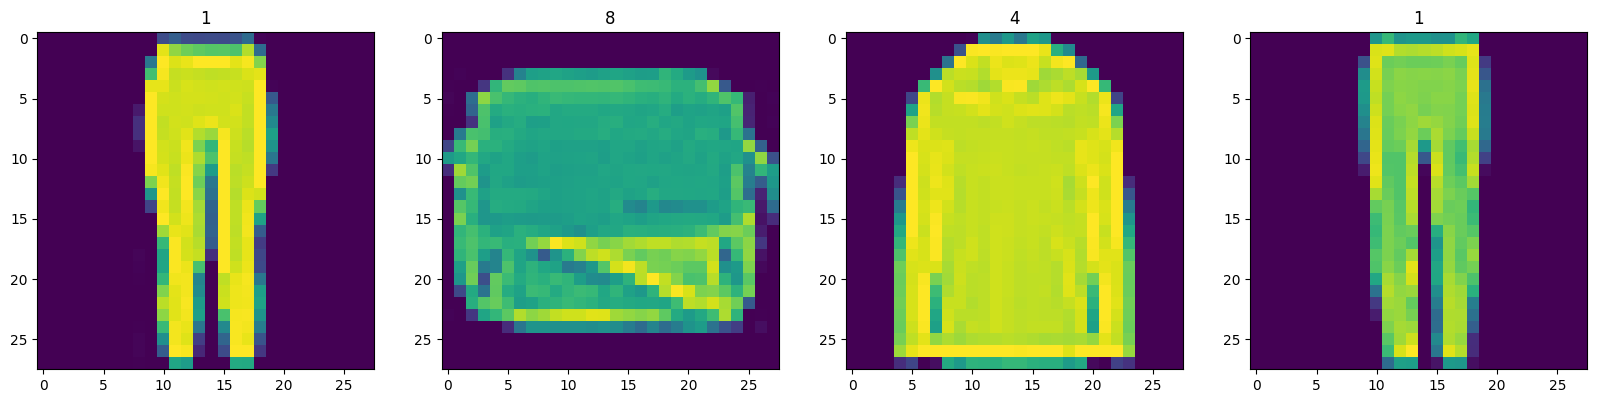

In [11]:
#setup subplot formatting
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
    batch = dataiterator.next()
    ax[idx].imshow(np.squeeze(batch['image']))
    ax[idx].title.set_text(batch['label'])

In [12]:
def scale_images(data):
    image=data['image']
    return image/255

In [13]:
ds =tfds.load('fashion_mnist', split='train')
ds=ds.map(scale_images)
ds=ds.cache()
ds=ds.shuffle(60000)
ds=ds.batch(128)
ds=ds.prefetch(64)

# 3 build neural network

# 3.1 import modelling components

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

# 3.2 build generator

In [15]:
def build_generator():
    model = Sequential()
    model.add(Dense(7*7*128, input_dim=128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128)))
    
    #upsampling block
    model.add(UpSampling2D())
    model.add(Conv2D(128,5,padding='same'))
    model.add(LeakyReLU(0.2))

    #upsampling block 2
    model.add(UpSampling2D())
    model.add(Conv2D(128,5,padding='same'))
    model.add(LeakyReLU(0.2))

    #downsampling block
    model.add(Conv2D(128,4,padding='same'))
    model.add(LeakyReLU(0.2))

    #downsampling block 2
    model.add(Conv2D(128,4,padding='same'))
    model.add(LeakyReLU(0.2))

    #conv layer to get to one channel
    model.add(Conv2D(1,4,padding='same',activation='sigmoid'))

    return model

In [16]:
test_model = build_generator()


C:\Users\Prathamesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
test_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6272)                │         809,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 14, 14, 128)         │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 128)         │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 1)           │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,155,137 (8.22 MB)

 Trainable params: 2,155,137 (8.22 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
generator= build_generator()

In [19]:
generator.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 6272)                │         809,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_2 (UpSampling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 14, 14, 128)         │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_3 (UpSampling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 128)         │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_8 (LeakyReLU)            │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_9 (LeakyReLU)            │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 1)           │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,155,137 (8.22 MB)

 Trainable params: 2,155,137 (8.22 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
img=generator.predict(np.random.randn(4,128,1))
img

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


array([[[[0.4941372 ],
         [0.5009739 ],
         [0.5063862 ],
         ...,
         [0.5051484 ],
         [0.5022954 ],
         [0.50316644]],

        [[0.50456417],
         [0.50377744],
         [0.49898195],
         ...,
         [0.5007827 ],
         [0.5070045 ],
         [0.5017675 ]],

        [[0.49825475],
         [0.5001496 ],
         [0.49243933],
         ...,
         [0.4955801 ],
         [0.50391686],
         [0.49509555]],

        ...,

        [[0.5045991 ],
         [0.5013659 ],
         [0.5008455 ],
         ...,
         [0.4996559 ],
         [0.50013196],
         [0.49823028]],

        [[0.49947417],
         [0.49440762],
         [0.49968433],
         ...,
         [0.49691057],
         [0.4976617 ],
         [0.497544  ]],

        [[0.5036969 ],
         [0.5003289 ],
         [0.50115466],
         ...,
         [0.49546194],
         [0.49773768],
         [0.49838197]]],


       [[[0.49869525],
         [0.49926707],
         [0.49

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


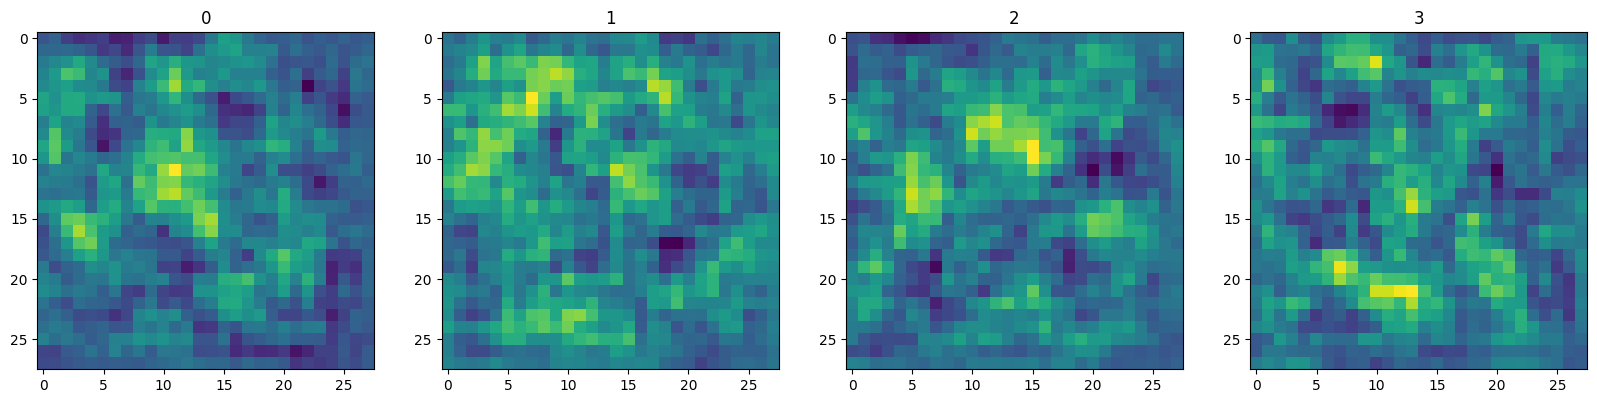

In [26]:
#setup subplot formatting
img = generator.predict(np.random.randn(4,128,1))
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx,img in enumerate(img):
    ax[idx].imshow(np.squeeze(img))
    ax[idx].title.set_text(idx)

# 3.3 build discriminator

In [22]:
def build_discriminator():
    model = Sequential()
    
    # Conv2D expects a tuple for the kernel size, so (5, 5) instead of 5
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1)))  #32 filters of size 5x5 , i/p shape= o/p shape = 28
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    #conv layer 2
    model.add(Conv2D(64, (5, 5)))  #32 filters of size 5x5 , i/p shape= o/p shape = 28
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    #conv layer 3
    model.add(Conv2D(128, (5, 5)))  #32 filters of size 5x5 , i/p shape= o/p shape = 28
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    #conv layer 4
    model.add(Conv2D(256, (5, 5)))  #32 filters of size 5x5 , i/p shape= o/p shape = 28
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    model.add(Flatten())
    model.add(Dropout((0.4)))
    model.add(Dense(1, activation='sigmoid'))  # 1 represents false image ie fake image
    
    return model

In [23]:
discriminator =  build_discriminator()  

C:\Users\Prathamesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
discriminator.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 24, 24, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_10 (LeakyReLU)           │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 20, 20, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_11 (LeakyReLU)           │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 16, 16, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_12 (LeakyReLU)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 12, 12, 256)         │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_13 (LeakyReLU)           │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │          36,865 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,113,345 (4.25 MB)

 Trainable params: 1,113,345 (4.25 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
discriminator.predict(img)

ValueError: Exception encountered when calling Conv2D.call().

[1mNegative dimension size caused by subtracting 5 from 1 for '{{node sequential_2_1/conv2d_10_1/convolution}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](sequential_2_1/ExpandDims, sequential_2_1/conv2d_10_1/convolution/ReadVariableOp)' with input shapes: [28,28,1,1], [5,5,1,32].[0m

Arguments received by Conv2D.call():
  • inputs=tf.Tensor(shape=(28, 28, 1, 1), dtype=float32)

# 4 custom training loop

# 4.1 Setup losses and optimizers

In [28]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [29]:
g_opt = Adam(learning_rate = 0.0001)
d_opt = Adam(learning_rate = 0.00001)
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

# 4.2 build subclassed model

In [30]:
from tensorflow.keras.models import Model

In [31]:
# import tensorflow as tf
# class FashionGan(Model):
#     def __init__(self, generator,discriminator, *args, **kwargs):
#         super().__init__(*args, **kwargs)
#         #Create attributes for gen and disc
#         self.generator = generator
#         self.discriminator = discriminator
        
#     def compile(self,g_opt,d_opt,g_loss,d_loss,*args, **kwargs):
#         super().compile(*args, **kwargs)
#         #Create attributes for loss and optimizers
#         self.g_opt = g_opt
#         self.d_opt = d_opt
#         self.g_loss = g_loss
#         self.d_loss = d_loss
        
#     def call(self, inputs):
#         # Generate noise vectors
#         batch_size = tf.shape(inputs)[0]
#         noise = tf.random.normal((batch_size, 128))
#         # Generate fake images
#         return self.generator(noise)
        
#     def test_step(self, batch):
#         real_images = batch
#         fake_images = self.generator(tf.random.normal((128,128,1)),training = False)

#         #train discriminator
#         with tf.GradientTape() as d_tape:
#             #pass real and fake images to discriminator
#             yhat_real = self.discriminator(real_images, training = True)  #storing values of real images to the var
#             yhat_fake = self.discriminator(fake_images, training = True) # same for fake images
#             yhat_realfake = tf.concat([yhat_real, yhat_fake],axis=0)     # concating both
            
#             #create labels for real and fake images
#             y_realfake = tf.concat([tf.zeros_like(yhat_real),tf.ones_like(yhat_fake)], axis=0)  #true y values ie 0 for real images and 1 for fake images
#             #add noise to op
#             noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
#             noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
#             y_realfake += tf.concat([noise_real,noise_fake],axis=0)
#             #calculate loss
#             total_d_loss = self.d_loss(y_realfake,yhat_realfake)
#         #back propagation - nn learn
#         dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
#         self.d_opt.apply_gradients(zip(dgrad,self.discriminator.trainable_variables)) #applying backprop

#         #train generator
#         with tf.GradientTape() as g_tape:
#             #Generate some new images
#             gen_images = self.generator(tf.random.normal((128,128,1)),training = True)
#             #Create predicted labels
#             predicted_labels = self.discriminator(gen_images, training = False)
#             #Create loss-trick to training to fake out descriminator, rewarding generator if discriminator classifies generated image as real
#             total_g_loss = self.g_loss(tf.zeros_like(predicted_labels),predicted_labels)
#         #apply backprop
#         ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)  
#         self.g_opt.apply_gradients(zip(ggrad,self.generator.trainable_variables))
#         return {"d_loss":total_d_loss, "g_loss":total_g_loss}

import tensorflow as tf

class FashionGan(tf.keras.Model):
    def __init__(self, generator, discriminator, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.generator = generator
        self.discriminator = discriminator
    
    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
        super().compile(*args, **kwargs)
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss
        # Add a dummy loss to satisfy Keras' expectations
        self.loss = lambda y_true, y_pred: tf.reduce_mean(y_pred)
    
    def call(self, inputs):
        batch_size = tf.shape(inputs)[0]
        noise = tf.random.normal((batch_size, 128))
        return self.generator(noise)
    
    def train_step(self, batch):
        real_images = batch
        batch_size = tf.shape(real_images)[0]
        noise = tf.random.normal((batch_size, 128))
        
        # Train discriminator
        with tf.GradientTape() as d_tape:
            fake_images = self.generator(noise, training=True)
            yhat_real = self.discriminator(real_images, training=True)
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)
            
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)
            noise_real = 0.15 * tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15 * tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)
            
            total_d_loss = self.d_loss(y_realfake, yhat_realfake)
        
        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))
        
        # Train generator
        with tf.GradientTape() as g_tape:
            fake_images = self.generator(tf.random.normal((batch_size, 128)), training=True)
            predicted_labels = self.discriminator(fake_images, training=False)
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels)
        
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))
        
        return {"d_loss": total_d_loss, "g_loss": total_g_loss}

    def test_step(self, batch):
        # Implement if needed, or return an empty dict if not needed
        return {}

In [32]:
fashgan = FashionGan(generator, discriminator)


In [33]:
fashgan.compile(g_opt,d_opt,g_loss,d_loss)

# 4.3 build callback

In [34]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [35]:
import tensorflow as tf
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.preprocessing.image import array_to_img
import os

class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.normal((self.num_img, self.latent_dim))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images = (generated_images * 0.5 + 0.5) * 255  # Denormalize
        generated_images = tf.clip_by_value(generated_images, 0, 255)
        generated_images = generated_images.numpy().astype('uint8')
        
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('images', f'generated_img_{epoch}_{i}.png'))

In [36]:
import os
import tensorflow as tf
from tensorflow.keras.callbacks import Callback, ModelCheckpoint
from tensorflow.keras.preprocessing.image import array_to_img

class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.normal((self.num_img, self.latent_dim))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images = (generated_images * 0.5 + 0.5) * 255  # Denormalize
        generated_images = tf.clip_by_value(generated_images, 0, 255)
        generated_images = generated_images.numpy().astype('uint8')
        
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('images', f'generated_img_{epoch}_{i}.png'))

# Calculate steps_per_epoch
if isinstance(ds, tf.data.Dataset):
    steps_per_epoch = ds.cardinality().numpy()
    if steps_per_epoch == tf.data.INFINITE_CARDINALITY:
        raise ValueError("Dataset is infinite. Please specify steps_per_epoch manually.")
else:
    # If ds is not a tf.data.Dataset, you need to calculate steps_per_epoch manually
    # Assuming ds is some iterable with a __len__ method:
    steps_per_epoch = len(ds)

# Calculate save frequency in terms of batches
save_freq = max(1, int(5 * steps_per_epoch))  # Save every 5 epochs, but at least every epoch

# Define the checkpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath='model_epoch_{epoch:03d}.keras',
    save_freq=save_freq,  # Integer number of batches between saves
    save_weights_only=False,  # Save the entire model
    verbose=1
)

# Add the callbacks
callbacks = [ModelMonitor(), checkpoint_callback]

# 4.4 train

In [45]:
hist = fashgan.fit(ds, epochs=2000, callbacks=[ModelMonitor()])

Epoch 1/2000
469/469 ━━━━━━━━━━━━━━━━━━━━ 1854s 4s/step - d_loss: 0.5773 - g_loss: 1.6029
Epoch 2/2000
469/469 ━━━━━━━━━━━━━━━━━━━━ 1847s 4s/step - d_loss: 0.4129 - g_loss: 2.3118
Epoch 3/2000
469/469 ━━━━━━━━━━━━━━━━━━━━ 1848s 4s/step - d_loss: 0.2902 - g_loss: 5.9574
Epoch 4/2000
469/469 ━━━━━━━━━━━━━━━━━━━━ 1882s 4s/step - d_loss: 0.2812 - g_loss: 6.0443
Epoch 5/2000
469/469 ━━━━━━━━━━━━━━━━━━━━ 1847s 4s/step - d_loss: 0.2780 - g_loss: 5.9009
Epoch 6/2000
469/469 ━━━━━━━━━━━━━━━━━━━━ 1848s 4s/step - d_loss: 0.2751 - g_loss: 5.7169
Epoch 7/2000
469/469 ━━━━━━━━━━━━━━━━━━━━ 1848s 4s/step - d_loss: 0.2730 - g_loss: 5.4660
Epoch 8/2000
469/469 ━━━━━━━━━━━━━━━━━━━━ 1849s 4s/step - d_loss: 0.2724 - g_loss: 5.1872
Epoch 9/2000
469/469 ━━━━━━━━━━━━━━━━━━━━ 1849s 4s/step - d_loss: 0.2711 - g_loss: 4.9488
Epoch 10/2000
469/469 ━━━━━━━━━━━━━━━━━━━━ 1849s 4s/step - d_loss: 0.2705 - g_loss: 4.7138
Epoch 11/2000
469/469 ━━━━━━━━━━━━━━━━━━━━ 1848s 4s/step - d_loss: 0.2700 - g_loss: 4.5031
Epoch 12

KeyboardInterrupt: 

# 4.5 review performance

In [48]:
#plt.subtitle('Loss')
plt.plot(hist.history['d_loss'],label='d_loss')
plt.plot(hist.history['g_loss'],label='g_loss')
plt.legend()
plt.show()

NameError: name 'hist' is not defined

# 5 test out Generator

# 5.1 Generate images

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import model_from_json
import h5py

# Load the model architecture from the H5 file
with h5py.File('generatormodel.h5', 'r') as f:
    model_config = f.attrs.get('model_config')

# Convert bytes to string if necessary (depending on your Python version)
if isinstance(model_config, bytes):
    model_config = model_config.decode()

# Remove the 'groups' argument from the model configuration
model_config = model_config.replace('"groups": 1,', '')

# Recreate the model from the modified config
model = model_from_json(model_config, custom_objects={"Sequential": Sequential})

# Load weights into the model
with h5py.File('generatormodel.h5', 'r') as f:
    model.load_weights(f)

# Print the summary to check the model
model.summary()


ValueError: File format not supported: filepath=<HDF5 file "generatormodel.h5" (mode r)>. Keras 3 only supports V3 `.keras` and `.weights.h5` files, or legacy V1/V2 `.h5` files.

In [39]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('generatormodel.h5')

# Print the model summary to inspect the layers
model.summary()


TypeError: Error when deserializing class 'Conv2DTranspose' using config={'name': 'conv2d_transpose_42', 'trainable': True, 'dtype': 'float32', 'filters': 64, 'kernel_size': [5, 5], 'strides': [2, 2], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None, 'output_padding': None}.

Exception encountered: Unrecognized keyword arguments passed to Conv2DTranspose: {'groups': 1}

In [37]:
generator.load_weights(os.path.join('generatormodel.h5'))

ValueError: The shape of the target variable and the shape of the target value in `variable.assign(value)` must match. variable.shape=(128, 6272), Received: value.shape=(1, 256). Target variable: <KerasVariable shape=(128, 6272), dtype=float32, path=sequential_1/dense_1/kernel>

In [53]:
imgs =generator.predict(tf.random.normal((16,128,1)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


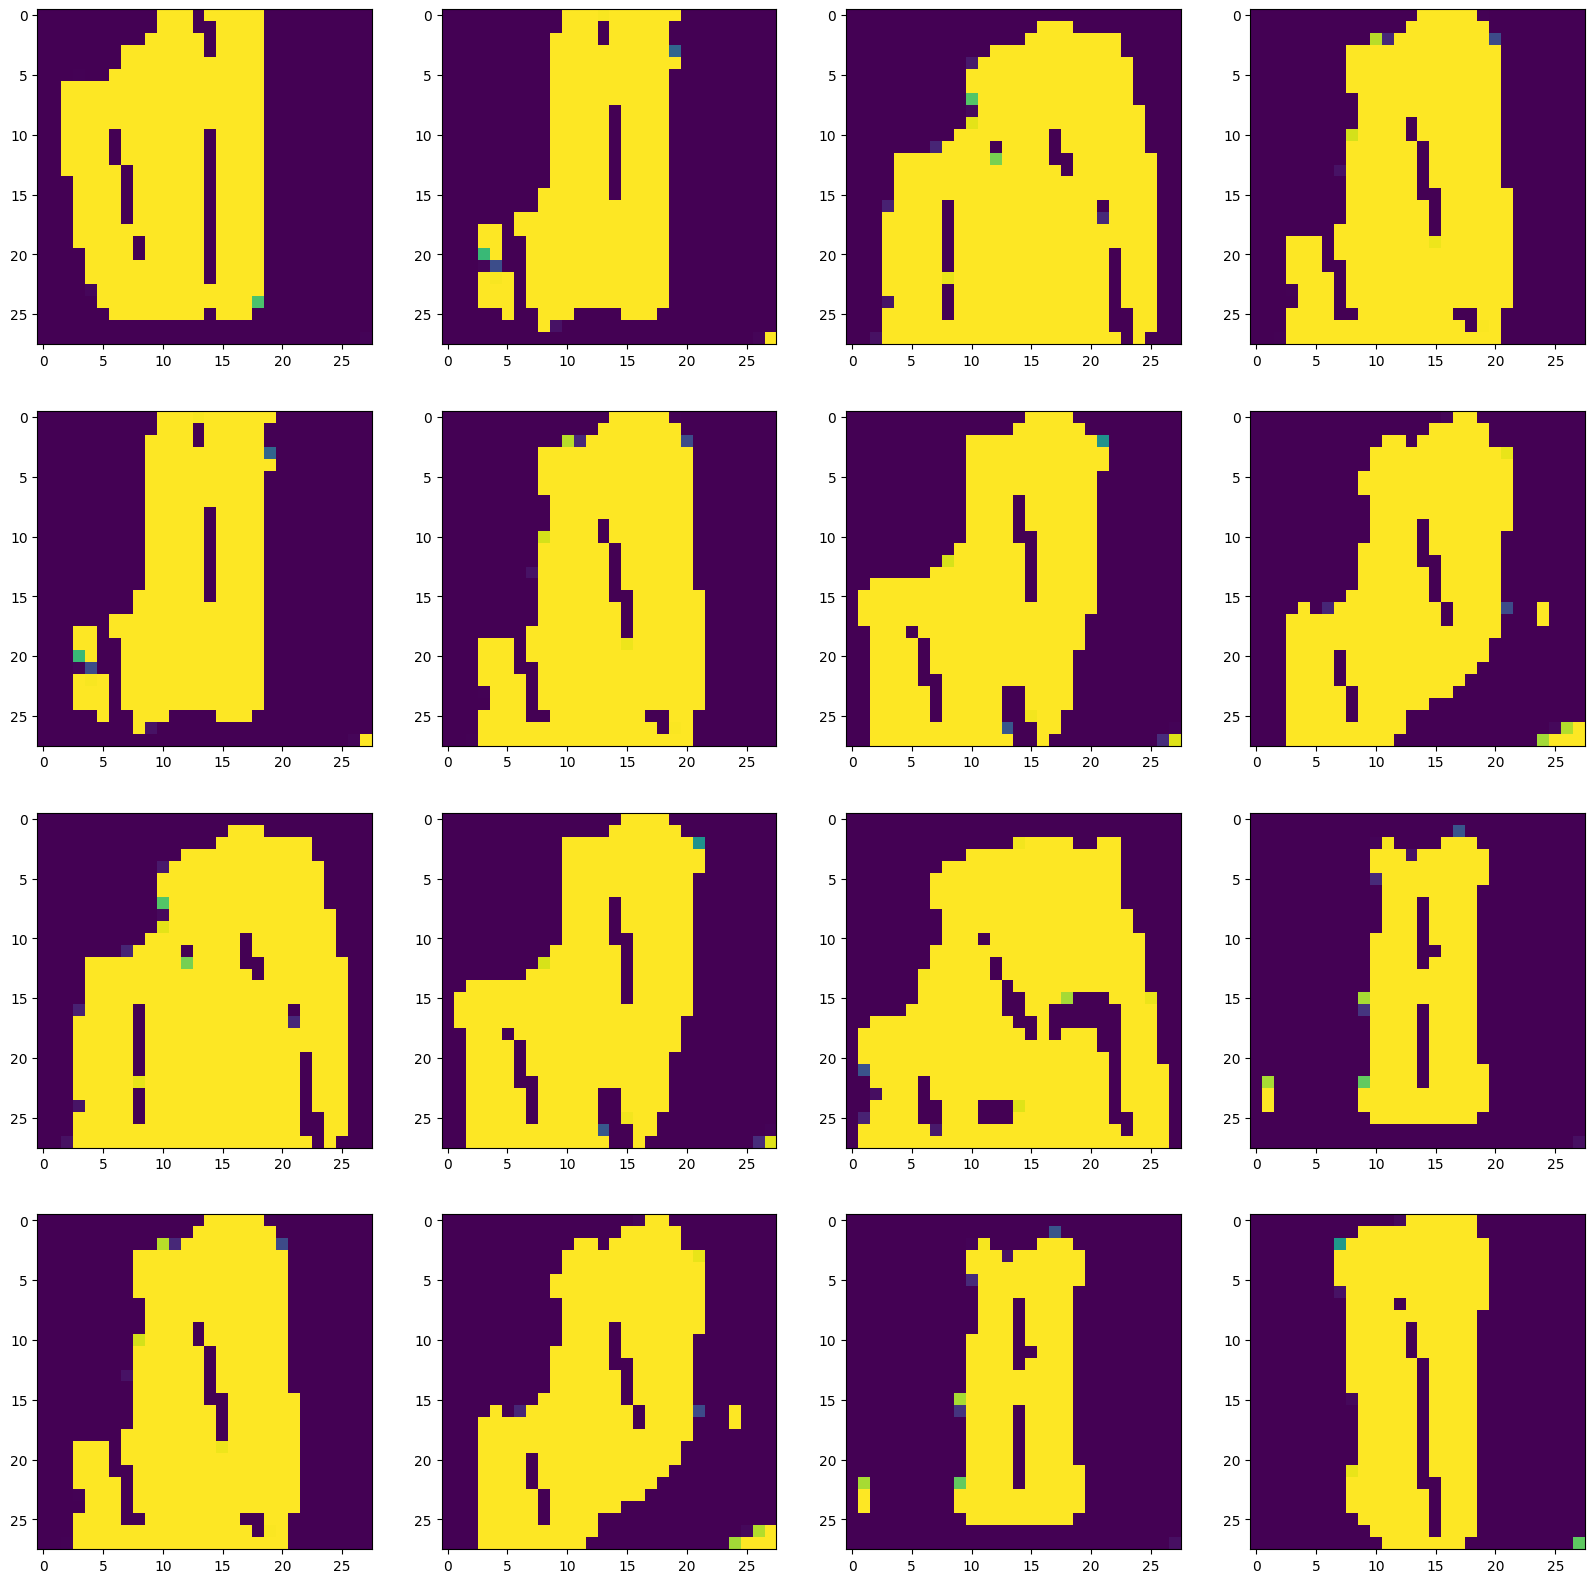

In [54]:
fig,ax = plt.subplots(ncols=4,nrows=4,figsize=(20,20))
for r in range(4):
    for c in range(4):
        ax[r][c].imshow(imgs[(r+1)*(c+1)-1])

In [ ]:
#saving the model
generator.save('generator.h5')
discriminator.save('discriminator.h5')